## **Importing Necessary Libraries and Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import calendar
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

## Loading the data
path ='/content/drive/MyDrive/Thesis/DewPointTemperature/EDA/3_Hourly_Dew_Point_Temperature.csv'
df = pd.read_csv(path, low_memory=False)
df

,StationName,Year,Month,Time,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,Dhaka,1980,1,0,10,12,14,13,12,12,...,9,10,12,9,11,11,17,14,11,8
1,Dhaka,1980,1,3,15,14,15,15,14,12,...,14,15,15,10,14,13,20,16,6,8
2,Dhaka,1980,1,6,12,14,15,11,14,10,...,8,14,8,7,11,9,19,7,1,*****
3,Dhaka,1980,1,9,10,15,15,9,11,11,...,6,11,6,6,11,11,7,6,*****,4
4,Dhaka,1980,1,12,12,15,17,12,14,13,...,11,13,11,12,13,14,12,8,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137371,Ambagan,2023,12,9,23,21,22,22,21,22,...,19,20,19,20,18,19,20,14,18,19
137372,Ambagan,2023,12,12,22,23,23,21,21,23,...,18,20,21,19,19,19,19,20,20,19
137373,Ambagan,2023,12,15,22,22,21,23,22,22,...,18,21,21,20,20,20,19.5,18,19,18
137374,Ambagan,2023,12,18,21,21,21,23,21,23,...,18,19,20,20,19.8,19,18.7,18,19,19


In [ ]:
# Melt the DataFrame into a long format
df_long = pd.melt(df, id_vars=['StationName', 'Year', 'Month', 'Time'], var_name='Day', value_name='DewPointTemperature')
df_long

,StationName,Year,Month,Time,Day,DewPointTemperature
0,Dhaka,1980,1,0,1,10
1,Dhaka,1980,1,3,1,15
2,Dhaka,1980,1,6,1,12
3,Dhaka,1980,1,9,1,10
4,Dhaka,1980,1,12,1,12
...,...,...,...,...,...,...
4258651,Ambagan,2023,12,9,31,19
4258652,Ambagan,2023,12,12,31,19
4258653,Ambagan,2023,12,15,31,18
4258654,Ambagan,2023,12,18,31,19


In [ ]:
df_long.shape

(4258656, 6)

In [ ]:
## Find the datatypes of the columns again
df_long.dtypes

,0
StationName,object
Year,int64
Month,int64
Time,int64
Day,object
DewPointTemperature,object


In [ ]:
# Find unique values in 'Year column
df_long['StationName'].unique()

array(['Dhaka', 'Tangail', 'Mymensingh', 'Faridpur', 'Madaripur',
       'Srimangal', 'Sylhet', 'Bogura', 'Dinajpur', 'Ishurdi', 'Rajshahi',
       'Rangpur', 'Syedpur', 'Chuadanga', 'Jessore', 'Khulna', 'Mongla',
       'Satkhira', 'Barishal', 'Bhola', 'Khepupara', 'Patuakhali',
       'Chandpur', 'Teknaf', 'Chittagong', 'Cumilla', 'CoxBazar', 'Feni',
       'Hatiya', 'Kutubdia', 'MaijidiCourt', 'Rangamati', 'Sandwip',
       'Sitakunda', 'Ambagan'], dtype=object)

In [ ]:
# Define a mapping from station name to numeric
station_mapping = {'Dhaka': 1, 'Tangail': 2, 'Mymensingh': 3, 'Faridpur': 4, 'Madaripur': 5,
                   'Srimangal': 6, 'Sylhet': 7, 'Bogura': 8, 'Dinajpur': 9, 'Ishurdi': 10,
                   'Rajshahi': 11, 'Rangpur': 12, 'Syedpur': 13, 'Chuadanga': 14, 'Jessore': 15,
                   'Khulna': 16, 'Mongla': 17, 'Satkhira': 18, 'Barishal': 19, 'Bhola': 20,
                   'Khepupara': 21, 'Patuakhali': 22, 'Chandpur': 23, 'Ambagan': 24,
                   'Chittagong': 25, 'Cumilla': 26, 'CoxBazar': 27, 'Feni': 28, 'Hatiya': 29,
                   'Kutubdia': 30, 'MaijidiCourt': 31, 'Rangamati': 32, 'Sandwip': 33,
                   'Sitakunda': 34, 'Teknaf': 35}

# Apply the mapping to the 'StationName' column
df_long['StationName'] = df_long['StationName'].map(station_mapping)

In [ ]:
df_long.dtypes

,0
StationName,int64
Year,int64
Month,int64
Time,int64
Day,object
DewPointTemperature,object


In [ ]:
# Find unique values in 'Year column
df_long['Year'].unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [ ]:
# Find unique values in 'Month column
df_long['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
# Find unique values in 'Time' column
df_long['Time'].unique()

array([ 0,  3,  6,  9, 12, 15, 18, 21])

In [ ]:
# Find unique values in 'Day' column
df_long['Day'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

In [ ]:
# Convert the Day column to numeric
df_long['Day'] = pd.to_numeric(df_long['Day'])
df_long

,StationName,Year,Month,Time,Day,DewPointTemperature
0,1,1980,1,0,1,10
1,1,1980,1,3,1,15
2,1,1980,1,6,1,12
3,1,1980,1,9,1,10
4,1,1980,1,12,1,12
...,...,...,...,...,...,...
4258651,24,2023,12,9,31,19
4258652,24,2023,12,12,31,19
4258653,24,2023,12,15,31,18
4258654,24,2023,12,18,31,19


In [ ]:
## Find the datatypes of the columns again
df_long.dtypes

,0
StationName,int64
Year,int64
Month,int64
Time,int64
Day,int64
DewPointTemperature,object


In [ ]:
# Find unique values in 'DewPointTemperature' column
df_long['DewPointTemperature'].unique()

array(['10', '15', '12', '14', '13', '8', '6', '9', '18', '19', '17',
       '*****', '16', '20', '21', '24', '23', '25', '26', '27', '22',
       '11', '18.9', '26.7', '25.6', '25.8', '7', '2', '5', '21.9',
       '22.8', '26.9', '3', '4', '28', '24.6', '20.8', '18.5', '16.5',
       '29', '24.8', '12.5', '25.5', '1', '26.5', '27.7', '24.9', '24.7',
       '19.9', '22.5', '16.9', '19.7', '18.6', '14.8', '23.6', '8.9',
       '9.5', '24.5', '12.6', '13.6', '16.8', '14.6', '26.6', '21.6',
       '17.6', '12.8', '13.8', '22.6', '15.8', '11.7', '13.5', '28.5',
       '23.7', '16.6', '23.8', '19.6', '20.6', '17.9', '25.7', '11.8',
       '14.9', '14.4', '11.9', '21.7', '15.7', '27.5', '20.5', '30',
       '26.8', '21.5', '22.7', '14.5', '16.7', '21.8', '19.5', '28.2',
       '15.5', '17.4', '10.8', '11.5', '13.7', '23.9', '10.5', '23.5',
       '27.8', '17.7', '7.3', '18.8', '27.4', '17.8', '10.6', '9.7',
       '13.9', '15.6', '8.5', '8.6', '11.6', '7.8', '9.8', '14.7', '8.7',
       '9.6

In [ ]:
## Count the number of '****' in the value column
df_long['DewPointTemperature'][df_long['DewPointTemperature'] == '*****'].count()

120802

In [ ]:
# To find the null values
df_long.isnull().sum()

,0
StationName,0
Year,0
Month,0
Time,0
Day,0
DewPointTemperature,77304


In [ ]:
# To find the NaN values
df_long.isna().sum()

,0
StationName,0
Year,0
Month,0
Time,0
Day,0
DewPointTemperature,77304


In [ ]:
# Replace '****' with NaN in the original DataFrame
df_long.loc[df_long['DewPointTemperature'] == '*****', 'DewPointTemperature'] = np.nan

# Drop the rows with NaN in the 'Value' column
df_long = df_long.dropna(subset=['DewPointTemperature'])

In [ ]:
## Count the number of '****' in the value column
df_long['DewPointTemperature'][df_long['DewPointTemperature'] == '*****'].count()

0

In [ ]:
# To find the null values
df_long.isnull().sum()

,0
StationName,0
Year,0
Month,0
Time,0
Day,0
DewPointTemperature,0


In [ ]:
# To find the null values
df_long.isna().sum()

,0
StationName,0
Year,0
Month,0
Time,0
Day,0
DewPointTemperature,0


In [ ]:
## Count the number of '****' in the value column
df_long['DewPointTemperature'][df_long['DewPointTemperature'] == '*'].count()

0

In [ ]:
df_long

,StationName,Year,Month,Time,Day,DewPointTemperature
0,1,1980,1,0,1,10
1,1,1980,1,3,1,15
2,1,1980,1,6,1,12
3,1,1980,1,9,1,10
4,1,1980,1,12,1,12
...,...,...,...,...,...,...
4258651,24,2023,12,9,31,19
4258652,24,2023,12,12,31,19
4258653,24,2023,12,15,31,18
4258654,24,2023,12,18,31,19


In [ ]:
df_long.shape

(4060550, 6)

In [ ]:
# Convert 'DewPointTemperature' column to numeric in the original DataFrame
df_long['DewPointTemperature'] = pd.to_numeric(df_long['DewPointTemperature'], errors='coerce')

<ipython-input-27-b72beb7a0b14>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_long['DewPointTemperature'] = pd.to_numeric(df_long['DewPointTemperature'], errors='coerce')


In [ ]:
## Find the datatypes of the columns again
df_long.dtypes

,0
StationName,int64
Year,int64
Month,int64
Time,int64
Day,int64
DewPointTemperature,float64


In [ ]:
df_long

,StationName,Year,Month,Time,Day,DewPointTemperature
0,1,1980,1,0,1,10.0
1,1,1980,1,3,1,15.0
2,1,1980,1,6,1,12.0
3,1,1980,1,9,1,10.0
4,1,1980,1,12,1,12.0
...,...,...,...,...,...,...
4258651,24,2023,12,9,31,19.0
4258652,24,2023,12,12,31,19.0
4258653,24,2023,12,15,31,18.0
4258654,24,2023,12,18,31,19.0


## **Exploratory Data Analysis**

## **Changes in Bangladesh’s Dew Point Temperature from 1980 to 2023**

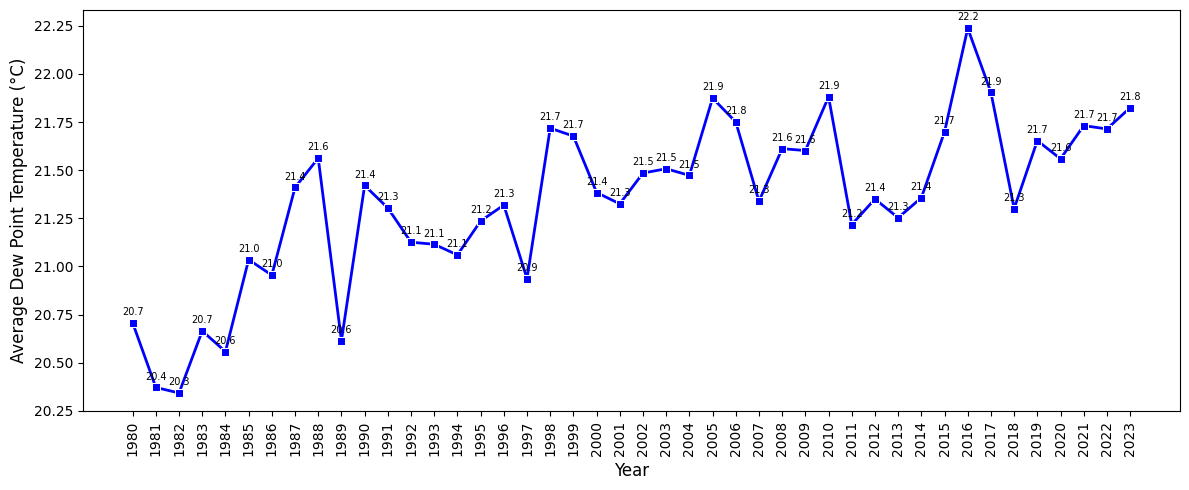

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Directory to save trend plots
dir_path = '/content/drive/MyDrive/Thesis/DewPointTemperature/EDA/Trend_Visualizations/'
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

# Convert the 'Year' column to integer if not already
df_long['Year'] = df_long['Year'].astype(int)

# Step 1: Calculate the yearly average dew point temperature across all stations
yearly_avg = df_long.groupby('Year')['DewPointTemperature'].mean().reset_index()

# Step 2: Plot the yearly average dew point temperature with customized markers and value labels
plt.figure(figsize=(12, 5))
sns.lineplot(data=yearly_avg, x='Year', y='DewPointTemperature', marker='s', color='b', linewidth=2)  # Changed marker to square ('s')

# Adding value labels for each point
for i in range(len(yearly_avg)):
    plt.text(yearly_avg['Year'][i], yearly_avg['DewPointTemperature'][i] + 0.03,  # Position the label slightly above the point
             f"{yearly_avg['DewPointTemperature'][i]:.1f}",  # Display the value with two decimal places
             ha='center', va='bottom', fontsize=7, color='black')

# Adding labels and title
#plt.title('Average Dew Point Temperature Change (1980 - 2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Dew Point Temperature (°C)', fontsize=12)
#plt.grid(True)
# Set all years as xticks
plt.xticks(yearly_avg['Year'], rotation=90)
plt.tight_layout()

plt.savefig(f'{dir_path}/avg_dew_temp_year.pdf')
# Show the plot
plt.show()


##**Overall Trend of Dew Point Temperature Across All Weather Stations (1980-2023)**

<ipython-input-32-fbe5c297854a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_long['Date'] = df_long.apply(create_date, axis=1)


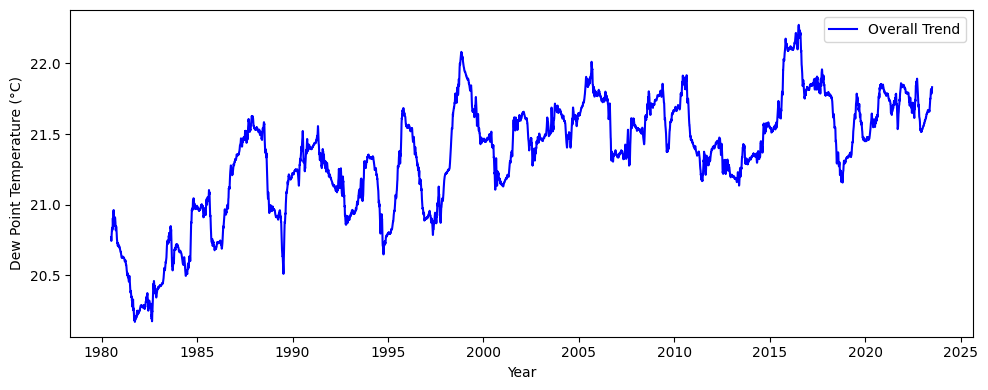

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime


# Directory to save trend plots
dir_path = '/content/drive/MyDrive/Thesis/DewPointTemperature/EDA/Trend_Visualizations/'
if not os.path.exists(dir_path):
    os.makedirs(dir_path)


# Function to create a Date from Year, Month, and Day columns
def create_date(row):
    try:
        return datetime(year=int(row['Year']), month=int(row['Month']), day=int(row['Day']))
    except ValueError as e:
        return pd.NaT  # Return Not a Time if there's an error

# Apply the function to create the Date column
df_long['Date'] = df_long.apply(create_date, axis=1)

# Drop rows with NaT in the Date column
df_long = df_long.dropna(subset=['Date'])

# Set 'Date' as the index
df_long.set_index('Date', inplace=True)

# Step 1: Aggregate the data across all stations by averaging the DewPointTemperature for each day
overall_daily_avg = df_long.resample('D')['DewPointTemperature'].mean()

# Step 2: Perform seasonal decomposition with period=365 (to capture yearly patterns)
decomposition = seasonal_decompose(overall_daily_avg.dropna(), model='additive', period=365)

# Extract the trend component
trend = decomposition.trend

# Step 3: Plot the trend component
plt.figure(figsize=(10, 4))
plt.plot(trend, label='Overall Trend', color='blue')
#plt.title('Overall Trend of Dew Point Temperature (All Stations)')
plt.xlabel('Year')
plt.ylabel('Dew Point Temperature (°C)')
plt.legend()
plt.tight_layout()


# Save the figure
plt.savefig(f'{dir_path}/Overall_DewPointTemperature_Trend.pdf')

# Show the plot
plt.show()


## **Variation in Average 3-Hourly Dew Point Temperature Throughout a Day and Night Across All Weather Stations**

In [ ]:
# Define function to categorize day or night
def day_or_night(hour):
    if 6 <= hour < 18:
        return 'Day'
    else:
        return 'Night'

# Add Day/Night feature
df_long['DayOrNight'] = df_long['Time'].apply(day_or_night)

# One-Hot Encoding for Day/Night
df_long = pd.get_dummies(df_long, columns=['DayOrNight'], prefix='DayOrNight')

# Convert boolean to numeric for day/night columns
day_night_columns = [col for col in df_long.columns if col.startswith('DayOrNight_')]
df_long[day_night_columns] = df_long[day_night_columns].astype(int)


<ipython-input-151-36a31af5b349>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_long['DayOrNight'] = df_long['Time'].apply(day_or_night)


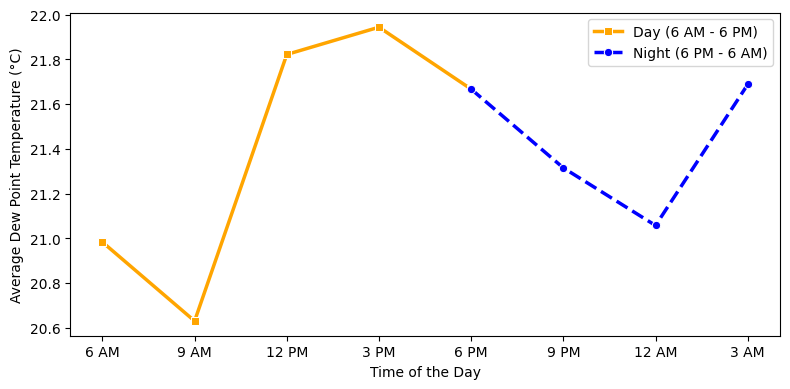

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Directory to save trend plots
dir_path = '/content/drive/MyDrive/Thesis/DewPointTemperature/EDA/Trend_Visualizations/'
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

# Prepare the data
df_long['AdjustedHour'] = df_long['Time'].apply(lambda x: x if x >= 6 else x + 24)  # Adjust for 24-hour format

# Calculate average dew point temperature for each hour
hourly_avg = df_long.groupby(['AdjustedHour'])['DewPointTemperature'].mean().reset_index()

# Set up the figure
plt.figure(figsize=(8, 4))

# Create line plots for average dew point temperatures for Day (6 AM - 6 PM)
day_data = hourly_avg[(hourly_avg['AdjustedHour'] >= 6) & (hourly_avg['AdjustedHour'] <= 18)]
sns.lineplot(data=day_data,
             x='AdjustedHour',
             y='DewPointTemperature',
             label='Day (6 AM - 6 PM)',
             color='orange',
             linewidth=2.5,
             marker='s')
# Create line plots for average dew point temperatures for Night (6 PM - 6 AM)
night_data = hourly_avg[((hourly_avg['AdjustedHour'] >= 18) & (hourly_avg['AdjustedHour'] < 30)) |
                         (hourly_avg['AdjustedHour'] <6)]
sns.lineplot(data=night_data,
             x='AdjustedHour',
             y='DewPointTemperature',
             label='Night (6 PM - 6 AM)',
             color='blue',
             linestyle='--',
             linewidth=2.5,
             marker='o')

# Customize plot labels and title
#plt.title('Average Dew Point Temperature Throughout the Day')
plt.xlabel('Time of the Day')
plt.ylabel('Average Dew Point Temperature (°C)')
plt.xticks(ticks=[6, 9, 12, 15, 18, 21, 24, 27], labels=['6 AM', '9 AM', '12 PM', '3 PM', '6 PM', '9 PM', '12 AM', '3 AM'])
plt.tight_layout()
plt.savefig(f'{dir_path}/Day_Night.pdf')
plt.show()


## **Average 3-Hourly Dew Point Temperature of All Months Across All Weather Stations (1980-2023)**

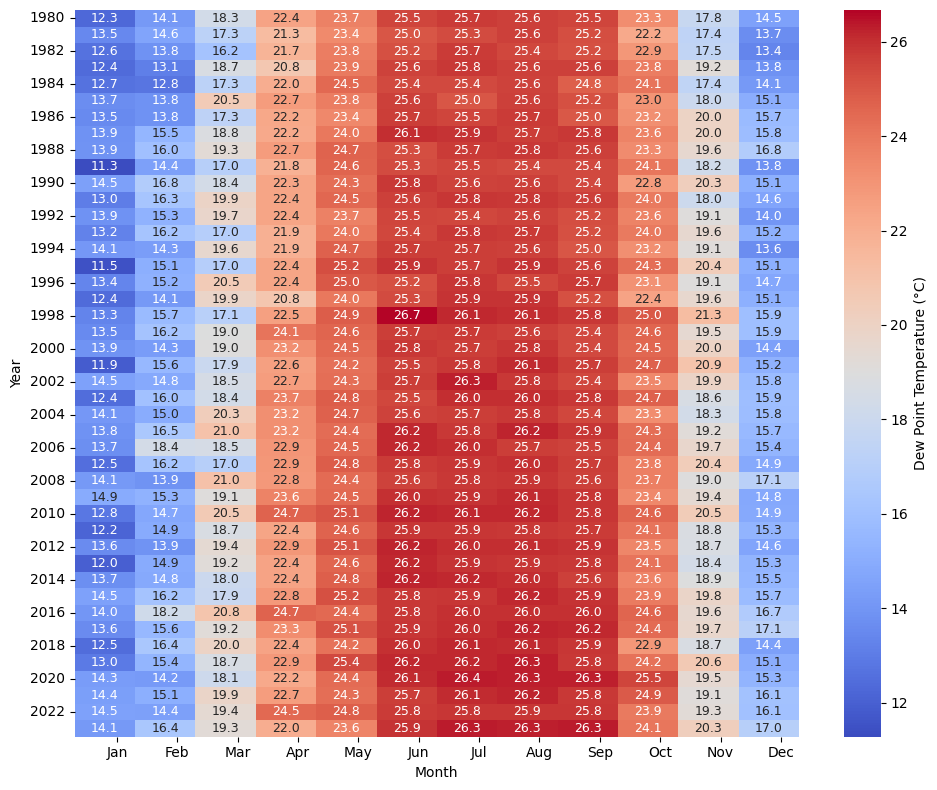

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Directory to save trend plots
dir_path = '/content/drive/MyDrive/Thesis/DewPointTemperature/EDA/Trend_Visualizations/'
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

# Sample data preparation (You already have df_long)
# df_long = pd.read_csv('your_dataset.csv')  # Uncomment to load your dataset

# Step 1: Aggregate the data
monthly_avg = df_long.groupby(['Year', 'Month'])['DewPointTemperature'].mean().reset_index()

# Step 2: Pivot the data for heatmap (X-axis: Month, Y-axis: Year)
pivot_table = monthly_avg.pivot(index='Year', columns='Month', values='DewPointTemperature')

# Step 3: Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".1f", cbar_kws={'label': 'Dew Point Temperature (°C)'}, annot_kws={"size": 9})
#plt.title('Monthly Dew Point Temperature Change (1980-2023)')
plt.xlabel('Month')
plt.ylabel('Year')

# Adjusting x-ticks for proper alignment in the middle of columns
plt.xticks(ticks=[i + 0.7 for i in range(len(pivot_table.columns))],
                 labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(rotation=0)  # Keep year labels horizontal for better readability
plt.tight_layout()
# Save the figure
plt.savefig(f'{dir_path}/Month_years.pdf')
plt.show()


## **Average 3-Hourly Dew Point Temperature for Each Day of the Month Across All Weather Stations (1980-2023)**

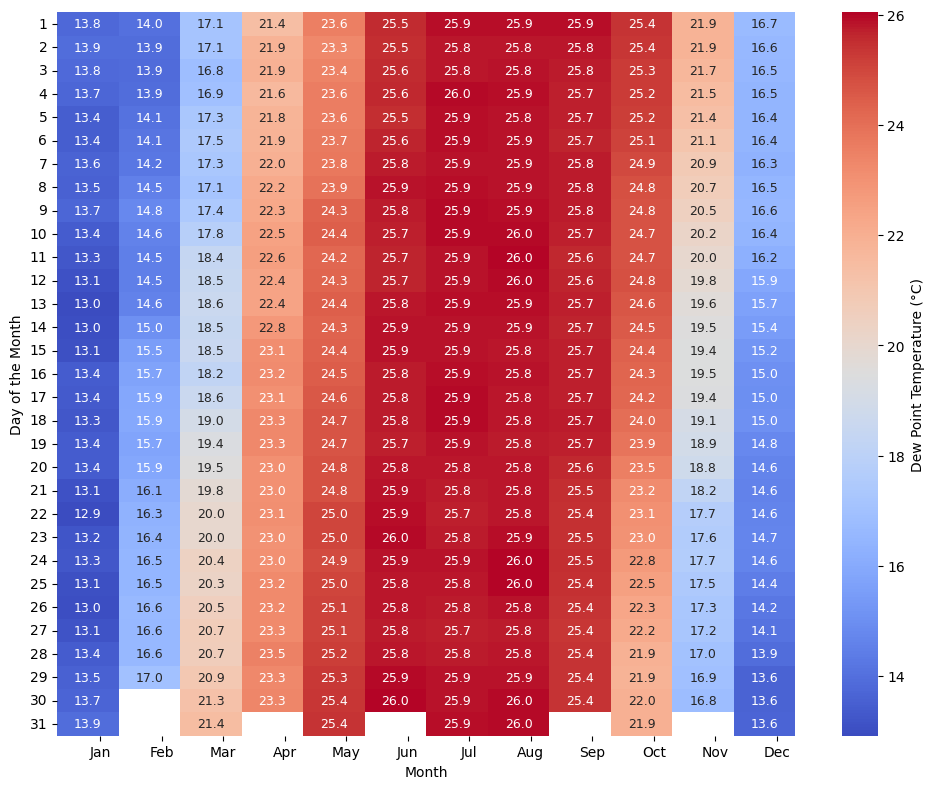

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data preparation (You already have df_long)
# df_long = pd.read_csv('your_dataset.csv')  # Uncomment to load your dataset

# Step 1: Aggregate the data for each day of the month (ignoring year)
daily_avg = df_long.groupby(['Month', 'Day'])['DewPointTemperature'].mean().reset_index()

# Step 2: Create a pivot table for heatmap (X-axis: Month, Y-axis: Day)
pivot_table_daily = daily_avg.pivot(index='Day', columns='Month', values='DewPointTemperature')

# Step 3: Generate the heatmap for each day of the month
plt.figure(figsize=(10, 8))  # Adjusted figure size for better layout
sns.heatmap(pivot_table_daily, cmap='coolwarm', annot=True, fmt=".1f", cbar_kws={'label': 'Dew Point Temperature (°C)'},
            annot_kws={"size": 9})  # Reduced font size for annotations
#plt.title('Average Dew Point Temperature by Day of the Month (1980-2023)')
plt.xlabel('Month')
plt.ylabel('Day of the Month')
# Adjusting x-ticks for proper alignment in the middle of columns
plt.xticks(ticks=[i + 0.7 for i in range(len(pivot_table_daily.columns))],
                 labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(rotation=0)  # Keep day labels horizontal for better readability
plt.tight_layout()
# Save the figure
plt.savefig(f'{dir_path}/Month_days.pdf')
plt.show()


## **Average 3-Hourly Dew Point Temperature Throughout Different Times of the Day Across All Weather Stations (1980-2023)**

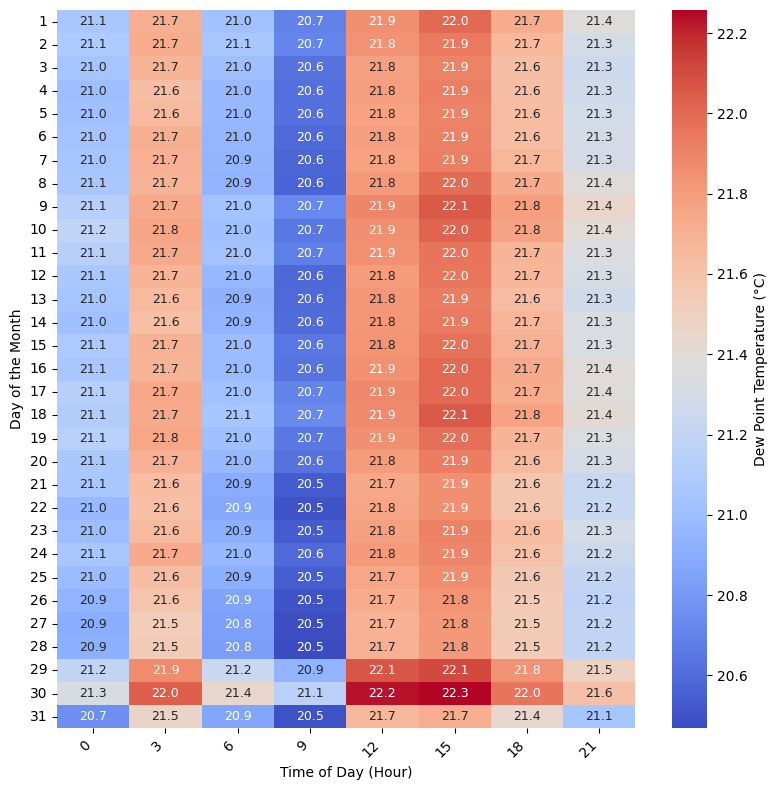

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data preparation (You already have df_long)
# df_long = pd.read_csv('your_dataset.csv')  # Uncomment to load your dataset

# Step 1: Aggregate the data for each hour of the day (ignoring year and month)
hourly_avg = df_long.groupby(['Day', 'Time'])['DewPointTemperature'].mean().reset_index()

# Step 2: Create a pivot table for heatmap (X-axis: Time, Y-axis: Day)
pivot_table_hourly = hourly_avg.pivot(index='Day', columns='Time', values='DewPointTemperature')

# Step 3: Generate the heatmap for each hour of the day
plt.figure(figsize=(8, 8))  # Adjusted figure size for better layout
sns.heatmap(pivot_table_hourly, cmap='coolwarm', annot=True, fmt=".1f", cbar_kws={'label': 'Dew Point Temperature (°C)'},
            annot_kws={"size": 9})  # Reduced font size for annotations
#plt.title('Average Dew Point Temperature by Hour of the Day (1980-2023)')
plt.xlabel('Time of Day (Hour)')
plt.ylabel('Day of the Month')

# Adjusting x-ticks for proper alignment in the middle of columns
plt.xticks(ticks=[i + 0.5 for i in range(len(pivot_table_hourly.columns))],
               labels=pivot_table_hourly.columns,
               rotation=45,
               ha='right')  # Adjust horizontal alignment for visibility


plt.yticks(rotation=0)  # Keep day labels horizontal for better readability
plt.tight_layout()

# Save the figure
plt.savefig(f'{dir_path}/days_time.pdf')
plt.show()


## **Average 3-Hourly Seasonal Dew Point Temperature Over the Years (1980-2023)**

<ipython-input-110-a59a435a8c94>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_long['Season'] = df_long.apply(lambda row: get_season(row['Month'], row['Day']), axis=1)


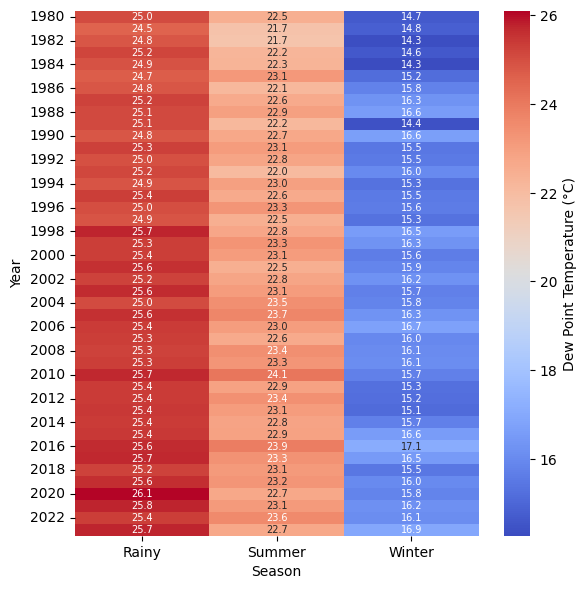

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Directory to save trend plots
dir_path = '/content/drive/MyDrive/Thesis/DewPointTemperature/EDA/Trend_Visualizations/'
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

# Sample data preparation (You already have df_long)
# df_long = pd.read_csv('your_dataset.csv')  # Uncomment to load your dataset

# Define function to determine the season based on month and day
def get_season(month, day):
    if (month == 11) or (month == 12) or (month == 1) or (month == 2):
        return 'Winter'
    elif (month >= 3 and month <= 6):
        return 'Summer'
    elif (month >= 7 and month <= 10):
        return 'Rainy'
    return 'Unknown'

# Add season column to the DataFrame
df_long['Season'] = df_long.apply(lambda row: get_season(row['Month'], row['Day']), axis=1)

# Step 1: Aggregate the data by year and season
seasonal_avg = df_long.groupby(['Year', 'Season'])['DewPointTemperature'].mean().reset_index()

# Step 2: Pivot the data for heatmap (X-axis: Season, Y-axis: Year)
pivot_season = seasonal_avg.pivot(index='Year', columns='Season', values='DewPointTemperature')

# Step 3: Generate the heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(pivot_season, cmap='coolwarm', annot=True, fmt=".1f", cbar_kws={'label': 'Dew Point Temperature (°C)'}, annot_kws={"size": 7})
plt.ylabel('Year')
plt.xlabel('Season')

# Adjusting x-ticks for better readability
plt.xticks(rotation=0)  # Keep season labels horizontal for better readability
plt.tight_layout()

# Save the figure
plt.savefig(f'{dir_path}/Season_years_heatmap.pdf')
plt.show()


## **Average 3-Hourly Dew Point Temperature Change of Each Day Over the Years (1980-2023**

Error creating date for row: StationName              33.0
Year                   2004.0
Month                     4.0
Time                     21.0
Day                      31.0
DewPointTemperature      24.3
Name: 4250423, dtype: float64, Error: day is out of range for month
Error creating date for row: StationName              33.0
Year                   2004.0
Month                     6.0
Time                     21.0
Day                      31.0
DewPointTemperature      24.0
Name: 4250439, dtype: float64, Error: day is out of range for month
Error creating date for row: StationName              33.0
Year                   2004.0
Month                     9.0
Time                     21.0
Day                      31.0
DewPointTemperature      25.0
Name: 4250463, dtype: float64, Error: day is out of range for month
Error creating date for row: StationName              33.0
Year                   2004.0
Month                    11.0
Time                     21.0
Day                 

<ipython-input-209-87deecf3fb3e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_long['Date'] = df_long.apply(create_date, axis=1)
<ipython-input-209-87deecf3fb3e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_long['DayOfYear'] = df_long['Date'].dt.dayofyear


4


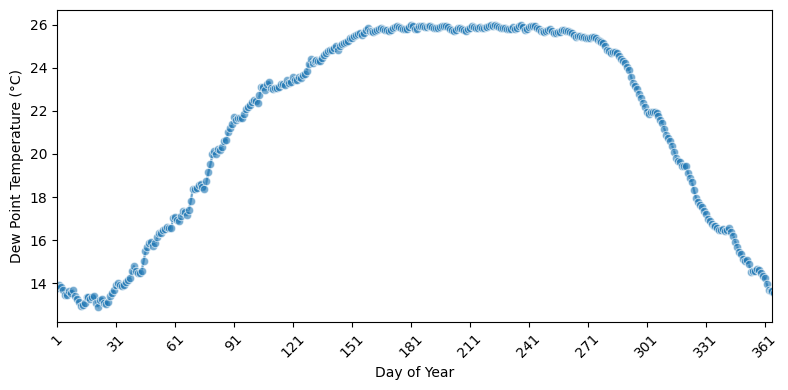

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

# Create Date and other features
def create_date(row):
    try:
        return datetime(year=int(row['Year']), month=int(row['Month']), day=int(row['Day']))
    except Exception as e:
        print(f"Error creating date for row: {row}, Error: {e}")
        return pd.NaT  # Return Not a Time if there's an error

# Apply functions and check for NaT values
df_long['Date'] = df_long.apply(create_date, axis=1)
print(df_long['Date'].isna().sum())

df_long['DayOfYear'] = df_long['Date'].dt.dayofyear

# Ensure that 'DayOfYear' and 'DewPointTemperature' columns are present
if 'DayOfYear' not in df_long.columns or 'DewPointTemperature' not in df_long.columns:
    raise ValueError("The dataframe must contain 'DayOfYear' and 'DewPointTemperature' columns.")

# Step 1: Prepare data
# Remove any NaN values if necessary
df_long = df_long.dropna(subset=['DayOfYear', 'DewPointTemperature'])

plt.figure(figsize=(8, 4))
sns.lineplot(x='DayOfYear', y='DewPointTemperature', data=df_long, marker='o', alpha=0.6)
#plt.title('Dew Point Temperature vs Day of Year (1980-2023)')
plt.xlabel('Day of Year')
plt.ylabel('Dew Point Temperature (°C)')
plt.xlim(1, 365)  # Adjust this based on leap years if needed
plt.xticks(range(1, 366, 30), rotation=45)  # Display ticks every 30 days for better readability
#plt.grid()
plt.tight_layout()
plt.savefig(f'{dir_path}/Dew_Point_Temperature_vs_DayOfYear_Line.pdf')
plt.show()


In [ ]:
df_long['Year'] = df_long['Year'].astype(int)
df_long['Month'] = df_long['Month'].astype(int)
df_long['Day'] = df_long['Day'].astype(int)

<ipython-input-30-40a1a42eb8e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_long['Year'] = df_long['Year'].astype(int)
<ipython-input-30-40a1a42eb8e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_long['Month'] = df_long['Month'].astype(int)
<ipython-input-30-40a1a42eb8e2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

## **Average 3-Hourly Dew Point Temperature for Each Month Across All Weather Stations (1980 vs. 2023)**

<ipython-input-33-1d439a792025>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_start_year['DewPointTemperature'] = df_start_year['DewPointTemperature'].round(1)
<ipython-input-33-1d439a792025>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_end_year['DewPointTemperature'] = df_end_year['DewPointTemperature'].round(1)


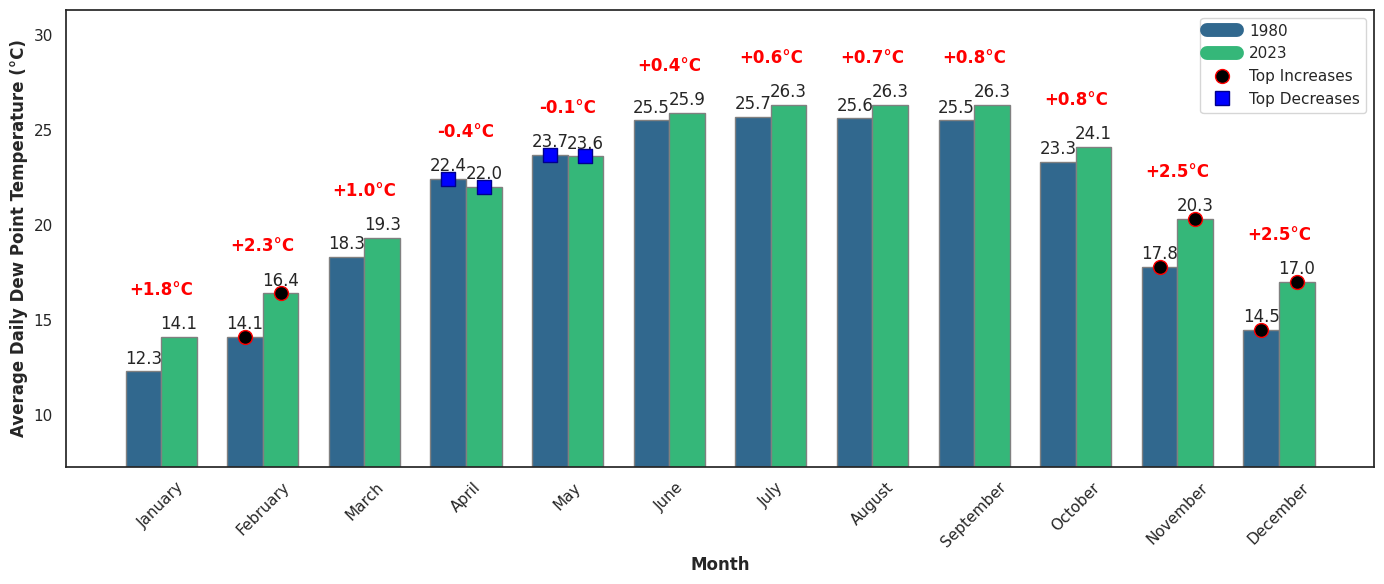

In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Directory to save trend plots
dir_path = '/content/drive/MyDrive/Thesis/DewPointTemperature/EDA/Trend_Visualizations/'
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

# Month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Aggregate data across all stations
# Group by 'Year' and 'Month' to get the overall mean dew point temperature for all stations
df_grouped = df_long.groupby(['Year', 'Month'])['DewPointTemperature'].mean().reset_index()

# Define the range of years (from 1980 to 2023)
start_year = 1980
end_year = 2023

# Filter data for the start and end years
df_start_year = df_grouped[df_grouped['Year'] == start_year]
df_end_year = df_grouped[df_grouped['Year'] == end_year]

# Round the temperatures for consistency
df_start_year['DewPointTemperature'] = df_start_year['DewPointTemperature'].round(1)
df_end_year['DewPointTemperature'] = df_end_year['DewPointTemperature'].round(1)

# Merge the two years on 'Month'
df_merged = pd.merge(df_start_year, df_end_year, on='Month', suffixes=(f'_{start_year}', f'_{end_year}'))

# Calculate the differences
df_merged['Difference'] = df_merged[f'DewPointTemperature_{end_year}'] - df_merged[f'DewPointTemperature_{start_year}']
df_merged['Difference'] = df_merged['Difference'].round(1)

# Identify the top 3 months with the highest increments
top_3_increases = df_merged.nlargest(3, 'Difference')

# Identify the top 3 months with the highest decreases
top_3_decreases = df_merged[df_merged['Difference'] < 0].nsmallest(3, 'Difference')

# Set position of bars on the X axis
bar_width = 0.35
r1 = np.arange(len(df_merged['Month']))
r2 = [x + bar_width for x in r1]

# Create the bar chart
plt.figure(figsize=(14, 6))

# Set the style without grid lines
sns.set(style="white", rc={"axes.grid": False})

# Using viridis color palette
colors = sns.color_palette("viridis", 2)

# Plot the average temperatures for the start and end years
plt.bar(r1, df_merged[f'DewPointTemperature_{start_year}'], color=colors[0], width=bar_width, edgecolor='grey', label=str(start_year))
plt.bar(r2, df_merged[f'DewPointTemperature_{end_year}'], color=colors[1], width=bar_width, edgecolor='grey', label=str(end_year))

# Add labels and title
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Average Daily Dew Point Temperature (°C)', fontweight='bold')
#plt.title(f'Average Daily Dew Point Temperature for Each Month ({start_year} vs {end_year})', fontweight='bold')

# Use the actual months present in the data for xticks
available_months = df_merged['Month']
available_month_names = [month_names[month - 1] for month in available_months]
plt.xticks([r + bar_width/2 for r in range(len(df_merged['Month']))], available_month_names, rotation=45)

# Set y-axis limit dynamically based on the data
min_temp = min(df_merged[f'DewPointTemperature_{start_year}'].min(), df_merged[f'DewPointTemperature_{end_year}'].min())
max_temp = max(df_merged[f'DewPointTemperature_{start_year}'].max(), df_merged[f'DewPointTemperature_{end_year}'].max())
plt.ylim(min_temp - 5, max_temp + 5)

# Add values on top of bars and highlight the differences
for i in range(len(r1)):
    start_temp = df_merged[f'DewPointTemperature_{start_year}'][i]
    end_temp = df_merged[f'DewPointTemperature_{end_year}'][i]
    plt.text(r1[i], start_temp + 0.2, f"{start_temp:.1f}", ha='center', va='bottom')
    plt.text(r2[i], end_temp + 0.2, f"{end_temp:.1f}", ha='center', va='bottom')

    difference = df_merged["Difference"][i]
    sign = '+' if difference > 0 else ''
    plt.text(r1[i] + bar_width/2, max(start_temp, end_temp) + 2.0,
             f'{sign}{difference:.1f}°C',
             ha='center', va='bottom', fontweight='bold', color='red')

    # Mark the top 3 increments
    if df_merged.iloc[i]['Month'] in top_3_increases['Month'].values:
        plt.scatter(r1[i], start_temp, color='black', edgecolor='red', s=100, zorder=5, marker='o')
        plt.scatter(r2[i], end_temp, color='black', edgecolor='red', s=100, zorder=5, marker='o')

    # Mark the top 3 decreases
    if df_merged.iloc[i]['Month'] in top_3_decreases['Month'].values:
        plt.scatter(r1[i], start_temp, color='blue', edgecolor='darkblue', s=100, zorder=5, marker='s')
        plt.scatter(r2[i], end_temp, color='blue', edgecolor='darkblue', s=100, zorder=5, marker='s')

# Turn off the grid
plt.grid(False)

# Add a proper legend
increase_marker = plt.Line2D([0], [0], color='black', marker='o', linestyle='None', markersize=10, markeredgecolor='red')
decrease_marker = plt.Line2D([0], [0], color='blue', marker='s', linestyle='None', markersize=10, markeredgecolor='darkblue')

# Check if there are any decreases to show in the legend
legend_handles = [
    plt.Line2D([0], [0], color=colors[0], lw=10),
    plt.Line2D([0], [0], color=colors[1], lw=10),
    increase_marker
]
legend_labels = [
    str(start_year),
    str(end_year),
    'Top Increases'
]

# Add decrease marker to the legend if there are decreases
if not top_3_decreases.empty:
    legend_handles.append(decrease_marker)
    legend_labels.append('Top Decreases')

plt.legend(handles=legend_handles, labels=legend_labels)

# Adjust the layout
plt.tight_layout()


# Save the figure
plt.savefig(f'{dir_path}/Average_Daily_DewPointTemperature_Change_for_Each_Month.pdf')

# Show the plot
plt.show()


## **Average 3-Hourly Dew Point Temperature for Each Season Across All Weather Stations (1980 vs. 2023)**

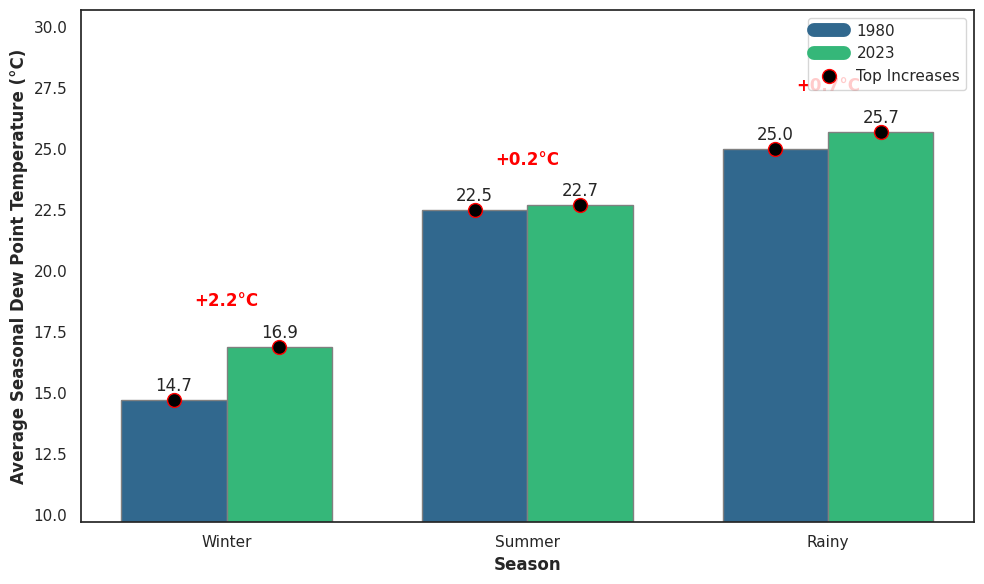

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the function to assign three seasons
def get_season(month, day):
    if (month == 11) or (month == 12) or (month == 1) or (month == 2):
        return 'Winter'
    elif (month >= 3 and month <= 6):
        return 'Summer'
    elif (month >= 7 and month <= 10):
        return 'Rainy'
    return 'Unknown'

# Apply the function to the dataset to assign seasons
df_long['Season'] = df_long.apply(lambda row: get_season(row['Month'], row['Day']), axis=1)

# Directory to save trend plots
dir_path = '/content/drive/MyDrive/Thesis/DewPointTemperature/EDA/Trend_Visualizations/'
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

# List of three seasons
season_names = ['Winter', 'Summer', 'Rainy']

# Get the overall range of years across all stations
start_year = df_long['Year'].min()
end_year = df_long['Year'].max()

# Extract data for the start and end years across all stations
df_start_year = df_long[df_long['Year'] == start_year]
df_end_year = df_long[df_long['Year'] == end_year]

# Group by 'Season' and calculate mean DewPointTemperature across all stations
df_grouped_start_year = df_start_year.groupby(['Season'])['DewPointTemperature'].mean().reset_index()
df_grouped_end_year = df_end_year.groupby(['Season'])['DewPointTemperature'].mean().reset_index()

# Round the temperatures to one decimal place for consistency
df_grouped_start_year['DewPointTemperature'] = df_grouped_start_year['DewPointTemperature'].round(1)
df_grouped_end_year['DewPointTemperature'] = df_grouped_end_year['DewPointTemperature'].round(1)

# Ensure all seasons are present in both years
all_seasons = season_names
df_grouped_start_year = df_grouped_start_year.set_index('Season').reindex(all_seasons).reset_index()
df_grouped_end_year = df_grouped_end_year.set_index('Season').reindex(all_seasons).reset_index()

# Merge the two years on Season
df_merged = pd.merge(df_grouped_start_year, df_grouped_end_year, on='Season', suffixes=(f'_{start_year}', f'_{end_year}'))

# Calculate the differences
df_merged['Difference'] = df_merged[f'DewPointTemperature_{end_year}'] - df_merged[f'DewPointTemperature_{start_year}']
df_merged['Difference'] = df_merged['Difference'].round(1)

# Identify the top 3 seasons with the highest increments (in this case, might be fewer than 3)
top_increases = df_merged.nlargest(3, 'Difference')

# Identify the top decreases
top_decreases = df_merged[df_merged['Difference'] < 0].nsmallest(3, 'Difference')

# Set position of bar on X axis
bar_width = 0.35
r1 = np.arange(len(df_merged['Season']))
r2 = [x + bar_width for x in r1]

# Create the bar chart
plt.figure(figsize=(10, 6))

# Set the style without grid lines
sns.set(style="white", rc={"axes.grid": False})

# Using viridis color palette
colors = sns.color_palette("viridis", 2)

plt.bar(r1, df_merged[f'DewPointTemperature_{start_year}'], color=colors[0], width=bar_width, edgecolor='grey', label=str(start_year))
plt.bar(r2, df_merged[f'DewPointTemperature_{end_year}'], color=colors[1], width=bar_width, edgecolor='grey', label=str(end_year))

# Add labels and title
plt.xlabel('Season', fontweight='bold')
plt.ylabel('Average Seasonal Dew Point Temperature (°C)', fontweight='bold')

# Use the actual seasons present in the data for xticks
plt.xticks([r + bar_width/2 for r in range(len(df_merged['Season']))], season_names)

# Set y-axis limit dynamically based on the data
min_temp = min(df_merged[f'DewPointTemperature_{start_year}'].min(), df_merged[f'DewPointTemperature_{end_year}'].min())
max_temp = max(df_merged[f'DewPointTemperature_{start_year}'].max(), df_merged[f'DewPointTemperature_{end_year}'].max())
plt.ylim(min_temp - 5, max_temp + 5)

# Add values on the top of bars and highlight the differences
for i in range(len(r1)):
    start_temp = df_merged[f'DewPointTemperature_{start_year}'][i]
    end_temp = df_merged[f'DewPointTemperature_{end_year}'][i]
    plt.text(r1[i], start_temp + 0.2, f"{start_temp:.1f}", ha='center', va='bottom')
    plt.text(r2[i], end_temp + 0.2, f"{end_temp:.1f}", ha='center', va='bottom')

    difference = df_merged["Difference"][i]
    sign = '+' if difference > 0 else ''
    plt.text(r1[i] + bar_width/2, max(start_temp, end_temp) + 1.5,
             f'{sign}{difference:.1f}°C',
             ha='center', va='bottom', fontweight='bold', color='red')

    # Mark increases and decreases
    if df_merged.iloc[i]['Season'] in top_increases['Season'].values:
        plt.scatter(r1[i], start_temp, color='black', edgecolor='red', s=100, zorder=5, marker='o')
        plt.scatter(r2[i], end_temp, color='black', edgecolor='red', s=100, zorder=5, marker='o')

    if df_merged.iloc[i]['Season'] in top_decreases['Season'].values:
        plt.scatter(r1[i], start_temp, color='blue', edgecolor='darkblue', s=100, zorder=5, marker='s')
        plt.scatter(r2[i], end_temp, color='blue', edgecolor='darkblue', s=100, zorder=5, marker='s')

# Turn off the grid
plt.grid(False)

# Add a proper legend
increase_marker = plt.Line2D([0], [0], color='black', marker='o', linestyle='None', markersize=10, markeredgecolor='red')
decrease_marker = plt.Line2D([0], [0], color='blue', marker='s', linestyle='None', markersize=10, markeredgecolor='darkblue')

# Check if there are any decreases to show in the legend
legend_handles = [
    plt.Line2D([0], [0], color=colors[0], lw=10),
    plt.Line2D([0], [0], color=colors[1], lw=10),
    increase_marker
]
legend_labels = [
    str(start_year),
    str(end_year),
    'Top Increases'
]

if not top_decreases.empty:
    legend_handles.append(decrease_marker)
    legend_labels.append('Top Decreases')

plt.legend(handles=legend_handles, labels=legend_labels)

# Adjust the layout
plt.tight_layout()

# Save the figure
plt.savefig(f'{dir_path}/Average_Seasonal_DewPointTemperature_Change_Three_Seasons.pdf')

# Show the plot
plt.show()


##**Average 3-Hourly Dew Point Temperature Per Decade (1980-2023)**

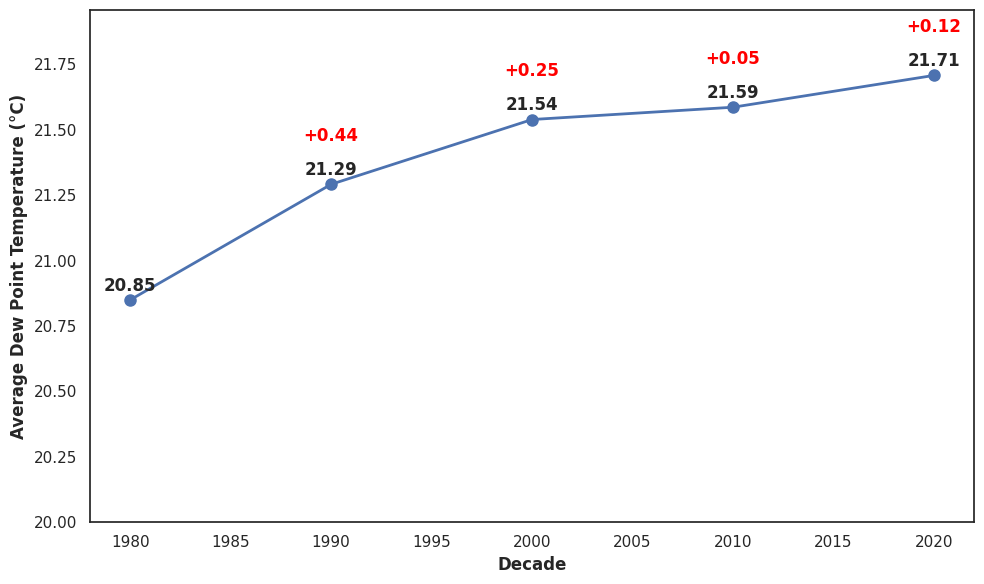

In [ ]:
plt.figure(figsize=(10, 6))

# Plot the line graph with markers for each decade
plt.plot(decade_avg_temp.index, decade_avg_temp.values, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)

# Add labels and title
plt.xlabel('Decade', fontweight='bold')
plt.ylabel('Average Dew Point Temperature (°C)', fontweight='bold')

# Annotate each point with the average temperature value
for i, value in enumerate(decade_avg_temp):
    plt.text(decade_avg_temp.index[i], value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontweight='bold')

# Show decade-to-decade temperature changes
for i, change in enumerate(temp_changes):
    sign = '+' if change > 0 else ''
    plt.text(decade_avg_temp.index[i+1], decade_avg_temp.iloc[i+1] + 0.15, f'{sign}{change:.2f}', ha='center', va='bottom', fontweight='bold', color='red')

plt.axhline(0, color='black', linewidth=1)

plt.ylim(20, max(decade_avg_temp) + .25)

# Show and save the plot
plt.tight_layout()
plt.savefig(f'{dir_path}/Average_Dew_Point_Temperature_Line_Per_Decade.pdf')
plt.show()
